In [41]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics

In [42]:
data = gpd.read_file("../output/film permit_city_from 2018.shp" )
data_sel = data[['EventID','StartDateT','EndDateTim','SegmentID','geometry']].drop_duplicates()      

ERROR:fiona._env:PROJ: proj_identify: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_create_from_name: Cannot find proj.db


In [51]:
data_sel_buffer=data_sel
data_sel_buffer['geometry']= data_sel.buffer(3,cap_style=2)

In [52]:
ct = gpd.read_file("../vector/2020 Census Tract_NYC" )
ct_sel = ct[['BoroCT2020','NTAName','GEOID','geometry']]

ERROR:fiona._env:PROJ: proj_identify: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_create_from_name: Cannot find proj.db


In [55]:
ct_data = ct_sel.sjoin(data_sel_buffer, how="left")
ct_data.head()

In [58]:
ct_data_count = ct_data[['BoroCT2020','EventID']].groupby(by=['BoroCT2020']).count()
ct_data_count = ct_data_count.rename(columns={"EventID":"Counts"})
ct_data_count.head()

,Counts
BoroCT2020,
1000100,0
1000201,24
1000202,67
1000500,0
1000600,186
...,...
5030302,0
5031901,0
5031902,6


In [59]:
ct_count = pd.merge(ct_sel, ct_data_count, how="left", on=["BoroCT2020"])
ct_count

,BoroCT2020,NTAName,GEOID,geometry,Counts
0,1000100,The Battery-Governors Island-Ellis Island-Libe...,36061000100,"MULTIPOLYGON (((972081.788 190733.467, 972184....",0
1,1000201,Chinatown-Two Bridges,36061000201,"POLYGON ((988548.218 197770.375, 987978.808 19...",24
2,1000202,Lower East Side,36061000202,"MULTIPOLYGON (((989137.110 196325.439, 989113....",67
3,1000500,The Battery-Governors Island-Ellis Island-Libe...,36061000500,"MULTIPOLYGON (((981219.056 188655.316, 980940....",0
4,1000600,Chinatown-Two Bridges,36061000600,"POLYGON ((986961.185 199553.643, 987206.139 19...",186
...,...,...,...,...,...
2320,5030302,Mariner's Harbor-Arlington-Graniteville,36085030302,"POLYGON ((939696.662 167578.833, 939768.394 16...",0
2321,5031901,Mariner's Harbor-Arlington-Graniteville,36085031901,"POLYGON ((939696.662 167578.833, 939508.024 16...",0
2322,5031902,Mariner's Harbor-Arlington-Graniteville,36085031902,"POLYGON ((939747.491 171919.373, 939778.967 17...",6
2323,5032300,Mariner's Harbor-Arlington-Graniteville,36085032300,"POLYGON ((936740.120 173125.853, 936712.951 17...",0


In [60]:
ct_count.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Per Month

In [61]:
from datetime import date

In [62]:
def range_to_list(a, b):
    return pd.date_range(a, b, freq = 'H')[:-1]

In [63]:
data_sel_buffer['StartEnd'] = [[i, j] for i, j in zip( data_sel_buffer['StartDateT'], data_sel_buffer['EndDateTim'])]
data_sel_buffer['TimeList'] = data_sel_buffer['StartEnd'].apply(lambda x: range_to_list(x[0], x[1]))
data_sel_buffer['month'] = data_sel_buffer['TimeList'].apply(lambda x: list(set(x.month)))

In [64]:
data_sel_buffer.dtypes

EventID          int64
StartDateT      object
EndDateTim      object
SegmentID       object
geometry      geometry
StartEnd        object
TimeList        object
month           object
dtype: object

In [65]:
data_sel_buffer['StartDateT'] = data_sel_buffer['StartDateT'].apply(pd.to_datetime)

## Only 2018

In [66]:
data_sel_2018 = data_sel_buffer[(data_sel_buffer['StartDateT']>='2018-1-1') & (data_sel_buffer['StartDateT']<'2019-1-1')]
data_sel_2018

,EventID,StartDateT,EndDateTim,SegmentID,geometry,StartEnd,TimeList,month
55474,455426,2018-12-31 00:01:00,01/01/2019 6:00:00 AM,0164755,"POLYGON ((985819.593 219749.894, 985822.521 21...","[12/31/2018 12:01:00 AM, 01/01/2019 6:00:00 AM]","DatetimeIndex(['2018-12-31 00:01:00', '2018-12...","[1, 12]"
55475,455426,2018-12-31 00:01:00,01/01/2019 6:00:00 AM,0164758,"POLYGON ((985847.020 220028.216, 985849.896 22...","[12/31/2018 12:01:00 AM, 01/01/2019 6:00:00 AM]","DatetimeIndex(['2018-12-31 00:01:00', '2018-12...","[1, 12]"
55476,454542,2018-12-30 00:01:00,12/30/2018 11:59:00 PM,0033807,"POLYGON ((985677.232 212626.164, 985680.132 21...","[12/30/2018 12:01:00 AM, 12/30/2018 11:59:00 PM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...",[12]
55479,454542,2018-12-30 00:01:00,12/30/2018 11:59:00 PM,0220962,"POLYGON ((985804.651 212862.361, 985809.899 21...","[12/30/2018 12:01:00 AM, 12/30/2018 11:59:00 PM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...",[12]
55480,455841,2018-12-30 00:01:00,01/01/2019 10:00:00 AM,0033807,"POLYGON ((985677.232 212626.164, 985680.132 21...","[12/30/2018 12:01:00 AM, 01/01/2019 10:00:00 AM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...","[1, 12]"
...,...,...,...,...,...,...,...,...
99530,390784,2018-01-04 06:00:00,01/04/2018 8:00:00 PM,0032097,"POLYGON ((984064.328 201899.531, 984069.373 20...","[01/04/2018 6:00:00 AM, 01/04/2018 8:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1]
99531,390784,2018-01-04 06:00:00,01/04/2018 8:00:00 PM,0032327,"POLYGON ((984288.273 201752.060, 984284.916 20...","[01/04/2018 6:00:00 AM, 01/04/2018 8:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1]
99532,391010,2018-01-04 06:00:00,01/04/2018 10:00:00 PM,0067758,"POLYGON ((1004947.501 214944.216, 1004942.382 ...","[01/04/2018 6:00:00 AM, 01/04/2018 10:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1]
99533,391010,2018-01-04 06:00:00,01/04/2018 10:00:00 PM,0067649,"POLYGON ((1005167.429 214812.414, 1005164.285 ...","[01/04/2018 6:00:00 AM, 01/04/2018 10:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1]


In [67]:
data_ct_2018 = data_sel_2018.sjoin(ct_sel, how="left")
data_ct_2018

,EventID,StartDateT,EndDateTim,SegmentID,geometry,StartEnd,TimeList,month,index_right,BoroCT2020,NTAName,GEOID
55474,455426,2018-12-31 00:01:00,01/01/2019 6:00:00 AM,0164755,"POLYGON ((985819.593 219749.894, 985822.521 21...","[12/31/2018 12:01:00 AM, 01/01/2019 6:00:00 AM]","DatetimeIndex(['2018-12-31 00:01:00', '2018-12...","[1, 12]",148.0,1013502,Hell's Kitchen,36061013502
55475,455426,2018-12-31 00:01:00,01/01/2019 6:00:00 AM,0164758,"POLYGON ((985847.020 220028.216, 985849.896 22...","[12/31/2018 12:01:00 AM, 01/01/2019 6:00:00 AM]","DatetimeIndex(['2018-12-31 00:01:00', '2018-12...","[1, 12]",148.0,1013502,Hell's Kitchen,36061013502
55476,454542,2018-12-30 00:01:00,12/30/2018 11:59:00 PM,0033807,"POLYGON ((985677.232 212626.164, 985680.132 21...","[12/30/2018 12:01:00 AM, 12/30/2018 11:59:00 PM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...",[12],105.0,1010100,Midtown South-Flatiron-Union Square,36061010100
55476,454542,2018-12-30 00:01:00,12/30/2018 11:59:00 PM,0033807,"POLYGON ((985677.232 212626.164, 985680.132 21...","[12/30/2018 12:01:00 AM, 12/30/2018 11:59:00 PM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...",[12],107.0,1010300,Chelsea-Hudson Yards,36061010300
55479,454542,2018-12-30 00:01:00,12/30/2018 11:59:00 PM,0220962,"POLYGON ((985804.651 212862.361, 985809.899 21...","[12/30/2018 12:01:00 AM, 12/30/2018 11:59:00 PM]","DatetimeIndex(['2018-12-30 00:01:00', '2018-12...",[12],105.0,1010100,Midtown South-Flatiron-Union Square,36061010100
...,...,...,...,...,...,...,...,...,...,...,...,...
99532,391010,2018-01-04 06:00:00,01/04/2018 10:00:00 PM,0067758,"POLYGON ((1004947.501 214944.216, 1004942.382 ...","[01/04/2018 6:00:00 AM, 01/04/2018 10:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1],1522.0,4005700,Astoria (Central),36081005700
99532,391010,2018-01-04 06:00:00,01/04/2018 10:00:00 PM,0067758,"POLYGON ((1004947.501 214944.216, 1004942.382 ...","[01/04/2018 6:00:00 AM, 01/04/2018 10:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1],1524.0,4005900,Astoria (Central),36081005900
99533,391010,2018-01-04 06:00:00,01/04/2018 10:00:00 PM,0067649,"POLYGON ((1005167.429 214812.414, 1005164.285 ...","[01/04/2018 6:00:00 AM, 01/04/2018 10:00:00 PM]","DatetimeIndex(['2018-01-04 06:00:00', '2018-01...",[1],1522.0,4005700,Astoria (Central),36081005700
99534,390863,2018-01-03 03:00:00,01/03/2018 11:00:00 AM,0034202,"POLYGON ((988632.938 216105.271, 988635.850 21...","[01/03/2018 3:00:00 AM, 01/03/2018 11:00:00 AM]","DatetimeIndex(['2018-01-03 03:00:00', '2018-01...",[1],98.0,1009600,Midtown-Times Square,36061009600


In [68]:
month1 = data_ct_2018.apply(lambda x: pd.Series(x['month']),axis=1).stack().reset_index(level=1, drop=True)
month1.name = 'month'
month1

55474     1.0
55474    12.0
55475     1.0
55475    12.0
55476    12.0
         ... 
99532     1.0
99532     1.0
99533     1.0
99534     1.0
99534     1.0
Name: month, Length: 61364, dtype: float64

In [69]:
data_ct_2018 = data_ct_2018.drop('month', axis=1).join(month1)
data_ct_2018['month'] = data_ct_2018['month'].astype(str)
data_ct_2018.dtypes

EventID                 int64
StartDateT     datetime64[ns]
EndDateTim             object
SegmentID              object
geometry             geometry
StartEnd               object
TimeList               object
index_right           float64
BoroCT2020             object
NTAName                object
GEOID                  object
month                  object
dtype: object

In [70]:
len(data_ct_2018)

129014

In [71]:
data_ct_2018[data_ct_2018['month']=='nan']

,EventID,StartDateT,EndDateTim,SegmentID,geometry,StartEnd,TimeList,index_right,BoroCT2020,NTAName,GEOID,month
81606,423452,2018-06-08 12:59:00,06/08/2018 1:00:00 PM,0034202,"POLYGON ((988632.938 216105.271, 988635.850 21...","[06/08/2018 12:59:00 PM, 06/08/2018 1:00:00 PM]","DatetimeIndex([], dtype='datetime64[ns]', freq...",98.0,1009600,Midtown-Times Square,36061009600,nan
81606,423452,2018-06-08 12:59:00,06/08/2018 1:00:00 PM,0034202,"POLYGON ((988632.938 216105.271, 988635.850 21...","[06/08/2018 12:59:00 PM, 06/08/2018 1:00:00 PM]","DatetimeIndex([], dtype='datetime64[ns]', freq...",133.0,1012500,Midtown-Times Square,36061012500,nan


In [72]:
#replace error month to their correct number
data_ct_2018['month']=data_ct_2018['month'].replace({'nan': 6})

# By Event

In [73]:
data_ct_2018_event = data_ct_2018[['BoroCT2020','EventID','month']]
data_ct_2018_event = data_ct_2018_event.drop_duplicates()
data_ct_2018_event

,BoroCT2020,EventID,month
55474,1013502,455426,1.0
55474,1013502,455426,12.0
55476,1010100,454542,12.0
55476,1010300,454542,12.0
55480,1010100,455841,1.0
...,...,...,...
99530,1004500,390784,1.0
99532,4005700,391010,1.0
99532,4005900,391010,1.0
99534,1009600,390863,1.0


In [74]:
month_count_event = data_ct_2018_event[['BoroCT2020','EventID','month']].groupby(by=['BoroCT2020','month']).count()
month_count_event = month_count_event.rename(columns={"EventID":"Counts"})
# month_count_event = pd.DataFrame(month_count)
month_count_event.reset_index(inplace = True)
month_count_event.head()

,BoroCT2020,month,Counts
0,1000201,10.0,1
1,1000201,11.0,1
2,1000201,3.0,1
3,1000202,10.0,1
4,1000202,11.0,1


In [75]:
geo_month_count_event = pd.merge(month_count_event, ct_sel, how="left", on=["BoroCT2020"])
geo_month_count_event['month'] = geo_month_count_event['month'].astype(float).astype(int)
geo_month_count_event.head()

,BoroCT2020,month,Counts,NTAName,GEOID,geometry
0,1000201,10,1,Chinatown-Two Bridges,36061000201,"POLYGON ((988548.218 197770.375, 987978.808 19..."
1,1000201,11,1,Chinatown-Two Bridges,36061000201,"POLYGON ((988548.218 197770.375, 987978.808 19..."
2,1000201,3,1,Chinatown-Two Bridges,36061000201,"POLYGON ((988548.218 197770.375, 987978.808 19..."
3,1000202,10,1,Lower East Side,36061000202,"MULTIPOLYGON (((989137.110 196325.439, 989113...."
4,1000202,11,1,Lower East Side,36061000202,"MULTIPOLYGON (((989137.110 196325.439, 989113...."


In [76]:
pivot_event = geo_month_count_event.pivot_table(index =['month'], values =['Counts'],columns='BoroCT2020')
pivot_event = pivot_event.sort_values(by=['month'])
pivot_event

Counts                                                          \
BoroCT2020 1000201 1000202 1000600 1000700 1000800 1000900 1001001 1001002   
month                                                                        
1              NaN     NaN     NaN     7.0     2.0     8.0     NaN     NaN   
2              NaN     NaN     1.0     5.0     1.0     3.0     1.0     NaN   
3              1.0     1.0     2.0    10.0     2.0     5.0     NaN     NaN   
4              NaN     1.0     1.0     3.0     1.0     3.0     NaN     2.0   
5              NaN     1.0    10.0     7.0     9.0     6.0     2.0     NaN   
6              NaN     3.0     2.0     3.0     2.0     6.0     NaN     NaN   
7              NaN     NaN     1.0     6.0     2.0     3.0     NaN     NaN   
8              NaN     1.0     5.0    10.0     2.0     3.0     2.0     1.0   
9              NaN     1.0     5.0     2.0     4.0     5.0     1.0     NaN   
10             1.0     1.0     5.0    11.0     6.0    12.0     NaN     1.0   
11             1.0     1.0     2.0     5.0     3.0     6.0     NaN     NaN   
12             NaN     NaN     NaN     3.0     1.0     3.0     1.0     NaN   

                            ...                                          \
BoroCT2020 1001200 1001300  ... 5022601 5022602 5023900 5024401 5024402   
month                       ...                                           
1              NaN     6.0  ...     NaN     NaN     NaN     NaN     NaN   
2              NaN     4.0  ...     1.0     1.0     NaN     1.0     NaN   
3              NaN     NaN  ...     2.0     3.0     NaN     NaN     NaN   
4              1.0     NaN  ...     NaN     1.0     NaN     3.0     NaN   
5              NaN     1.0  ...     1.0     NaN     NaN     3.0     1.0   
6              3.0     6.0  ...     2.0     2.0     1.0     NaN     NaN   
7              NaN     3.0  ...     NaN     NaN     NaN     NaN     1.0   
8              1.0     3.0  ...     NaN     NaN     NaN     NaN     NaN   
9              1.0     3.0  ...     1.0     1.0     NaN     NaN     NaN   
10             1.0     3.0  ...     NaN     NaN     NaN     NaN     NaN   
11             1.0     2.0  ...     NaN     1.0     NaN     1.0     NaN   
12             1.0     8.0  ...     NaN     NaN     NaN     NaN     NaN   

                                                    
BoroCT2020 5024700 5024800 5025100 5029104 5031902  
month                                               
1              NaN     NaN     NaN     NaN     NaN  
2              NaN     1.0     NaN     NaN     NaN  
3              NaN     NaN     NaN     NaN     NaN  
4              NaN     3.0     NaN     NaN     NaN  
5              NaN     1.0     NaN     NaN     NaN  
6              1.0     1.0     NaN     NaN     NaN  
7              NaN     NaN     NaN     4.0     NaN  
8              NaN     NaN     NaN     NaN     2.0  
9              NaN     NaN     NaN     NaN     NaN  
10             NaN     NaN     NaN     NaN     NaN  
11             NaN     NaN     1.0     NaN     NaN  
12             NaN     NaN     NaN     NaN     NaN  

[12 rows x 1379 columns]

# By Segemnt

In [77]:
# month_count = data_sel_2020[['BoroCT2020','SegmentID','month']].groupby(by=['BoroCT2020','month']).count()
# month_count = month_count.rename(columns={"SegmentID":"Counts"})
# month_count = pd.DataFrame(month_count)
# month_count.reset_index(inplace = True)
# month_count.head()

In [78]:
# geo_month_count = pd.merge(month_count, ct_sel, how="left", on=["BoroCT2020"])
# geo_month_count['month'] = geo_month_count['month'].astype(float).astype(int)
# geo_month_count.head()

In [79]:
# geo_month_count['month']

In [80]:
# pivot = geo_month_count.pivot_table(index =['month'], values =['Counts'],columns='BoroCT2020')
# pivot = pivot.sort_values(by=['month'])
# pivot

# CD33

In [81]:
# Extract the census tract in CD33
cd = gpd.read_file("../vector/Council Districts/nycc.shp")
cd

ERROR:fiona._env:PROJ: proj_identify: Cannot find proj.db
ERROR:fiona._env:PROJ: proj_create_from_name: Cannot find proj.db


,CounDist,Shape_Leng,Shape_Area,geometry
0,12,56950.325753,1.378710e+08,"POLYGON ((1032935.633 263568.648, 1032742.142 ..."
1,18,62147.949118,1.063834e+08,"MULTIPOLYGON (((1019671.203 235750.553, 101964..."
2,22,90245.526864,1.438791e+08,"MULTIPOLYGON (((1015928.158 221446.003, 101593..."
3,23,77505.769002,3.053992e+08,"POLYGON ((1059186.665 201882.960, 1058943.946 ..."
4,25,44473.211854,6.356096e+07,"POLYGON ((1021810.447 206724.285, 1021686.748 ..."
5,26,76308.576022,1.521541e+08,"POLYGON ((1002384.940 220244.057, 1002462.870 ..."
6,36,42153.181447,7.622171e+07,"POLYGON ((1004204.333 191728.315, 1004220.619 ..."
7,41,57718.376243,7.815681e+07,"POLYGON ((1006909.951 189709.569, 1006978.609 ..."
8,43,85429.591398,1.469386e+08,"POLYGON ((975287.051 173752.057, 975971.271 17..."
9,34,84321.770033,1.046177e+08,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."


In [82]:
cd33 = cd[cd['CounDist']==33]
cd33.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [83]:
geo_month_count_event = gpd.GeoDataFrame(geo_month_count_event, crs="EPSG:2263").set_geometry('geometry')
ct_cd33 = gpd.overlay(geo_month_count_event, cd33, how='intersection')

<AxesSubplot:>

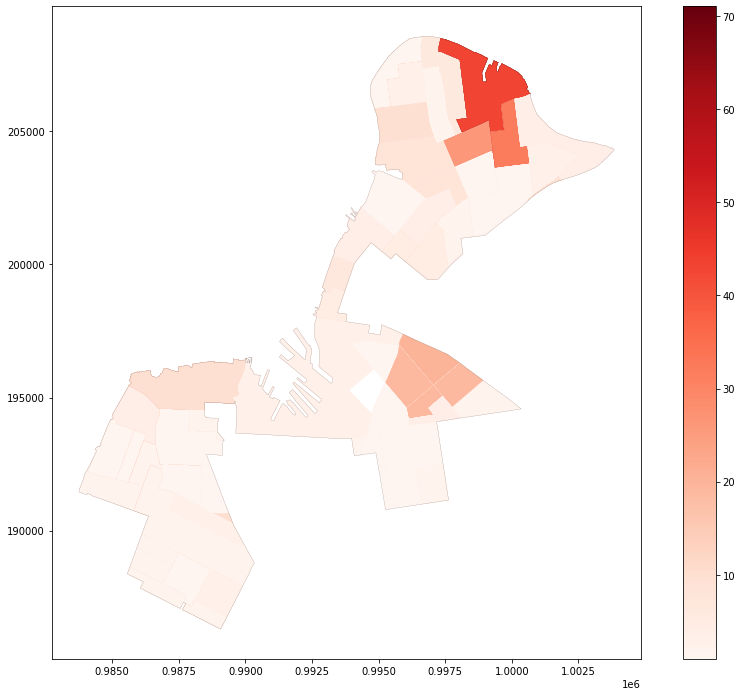

In [84]:
ax = cd33.boundary.plot(figsize=(15,12),linewidth=0.2, edgecolor='k', alpha=0.5)
ct_cd33.plot(ax=ax,column='Counts', cmap='Reds',legend=True)

In [85]:
ct_cd33['month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [86]:
pivot_33 = ct_cd33.pivot_table(index =['BoroCT2020'], values =['Counts'],columns='month')

# pivot_33 = pivot_33.sort_values(by=['month'])
pivot_33.to_csv('../output/Pivot_permits_cd33_2018_new.csv')
pivot_33

Counts                                                              \
month          1     2     3     4     5     6     7     8     9     10    11   
BoroCT2020                                                                      
1000900       8.0   3.0   5.0   3.0   6.0   6.0   3.0   3.0   5.0  12.0   6.0   
1001501       2.0   4.0   3.0   7.0   4.0   3.0   1.0   1.0   4.0   6.0   NaN   
1001502       3.0   5.0   9.0   7.0   3.0   4.0   4.0   8.0   1.0   7.0   3.0   
1002400       NaN   NaN   2.0   1.0   NaN   NaN   1.0   3.0   1.0   NaN   2.0   
1004400       NaN   NaN   2.0   NaN   3.0   NaN   NaN   NaN   NaN   2.0   NaN   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3058901      23.0  41.0  49.0  24.0  11.0  11.0  25.0  51.0  32.0  48.0  48.0   
3058902       NaN   NaN   3.0   NaN   NaN   NaN   2.0   9.0   4.0   5.0   1.0   
3059100       NaN   1.0   NaN   1.0   NaN   1.0   4.0   2.0   1.0   5.0   4.0   
3059300       NaN   NaN   3.0   NaN   NaN   1.0   4.0   9.0   3.0   5.0   1.0   
3123700       2.0   1.0   5.0   2.0   1.0   1.0   5.0   NaN   1.0   NaN   NaN   

                  
month         12  
BoroCT2020        
1000900      3.0  
1001501      4.0  
1001502      1.0  
1002400      NaN  
1004400      1.0  
...          ...  
3058901     41.0  
3058902      6.0  
3059100      2.0  
3059300      6.0  
3123700      2.0  

[89 rows x 12 columns]

## Only 2019

In [92]:
data_sel_2019 = data_sel_buffer[(data_sel_buffer['StartDateT']>='2019-1-1') & (data_sel_buffer['StartDateT']<'2020-1-1')]
data_ct_2019 = data_sel_2019.sjoin(ct_sel, how="left")
month1 = data_ct_2019.apply(lambda x: pd.Series(x['month']),axis=1).stack().reset_index(level=1, drop=True)
month1.name = 'month'
data_ct_2019 = data_ct_2019.drop('month', axis=1).join(month1)
data_ct_2019['month'] = data_ct_2019['month'].astype(str)

In [93]:
data_ct_2019[data_ct_2019['month']=='nan']
#replace error month to their correct number
# data_ct_2018['month']=data_ct_2018['month'].replace({'nan': 6})

,EventID,StartDateT,EndDateTim,SegmentID,geometry,StartEnd,TimeList,index_right,BoroCT2020,NTAName,GEOID,month


In [99]:
data_ct_2019_event = data_ct_2019[['BoroCT2020','EventID','month']]
data_ct_2019_event = data_ct_2019_event.drop_duplicates()

month_count_2019 = data_ct_2019_event[['BoroCT2020','EventID','month']].groupby(by=['BoroCT2020','month']).count()
month_count_2019 = month_count_2019.rename(columns={"EventID":"Counts"})
# month_count_event = pd.DataFrame(month_count)
month_count_2019.reset_index(inplace = True)
geo_month_count_2019 = pd.merge(month_count_2019, ct_sel, how="left", on=["BoroCT2020"])
geo_month_count_2019['month'] = geo_month_count_2019['month'].astype(float).astype(int)
geo_month_count_2019.head()

geo_month_count_2019 = gpd.GeoDataFrame(geo_month_count_2019, crs="EPSG:2263").set_geometry('geometry')
ct_cd33_2019 = gpd.overlay(geo_month_count_2019, cd33, how='intersection')

In [100]:
ct_cd33_2019['month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [102]:
pivot_33_2019 = ct_cd33_2019.pivot_table(index =['BoroCT2020'], values =['Counts'],columns='month')

# pivot_33 = pivot_33.sort_values(by=['month'])
pivot_33_2019.to_csv('../output/Pivot_permits_cd33_2019_new.csv')
pivot_33_2019

Counts                                                             \
month          1     2     3     4    5     6     7     8     9     10    11   
BoroCT2020                                                                     
1000900       1.0   1.0  10.0   6.0  6.0   4.0   9.0   5.0   3.0   4.0   1.0   
1001501       4.0   1.0   4.0   7.0  NaN   5.0   4.0   NaN   2.0   9.0   2.0   
1001502       3.0   8.0  14.0  14.0  7.0  11.0   3.0   NaN   6.0   7.0   3.0   
1002400       NaN   NaN   NaN   2.0  2.0   1.0   NaN   NaN   NaN   NaN   NaN   
1004400       NaN   1.0   2.0   8.0  1.0   NaN   NaN   1.0   1.0   2.0   NaN   
...           ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
3058901      30.0  28.0  48.0  22.0  8.0   4.0  20.0  44.0  45.0  56.0  48.0   
3058902       4.0   NaN   2.0   NaN  NaN   NaN  11.0   9.0   9.0  16.0   6.0   
3059100       1.0   1.0   1.0   NaN  NaN   1.0  11.0   9.0   3.0   9.0   1.0   
3059300       4.0   NaN   2.0   NaN  NaN   NaN   NaN   4.0   9.0  20.0   7.0   
3123700       5.0   3.0   3.0   3.0  NaN   1.0   1.0   2.0   NaN   NaN   4.0   

                  
month         12  
BoroCT2020        
1000900      1.0  
1001501      5.0  
1001502      5.0  
1002400      NaN  
1004400      2.0  
...          ...  
3058901     45.0  
3058902     12.0  
3059100      1.0  
3059300     13.0  
3123700      NaN  

[89 rows x 12 columns]

## Only 2020

In [104]:
data_sel_2020 = data_sel_buffer[(data_sel_buffer['StartDateT']>='2020-1-1') & (data_sel_buffer['StartDateT']<'2021-1-1')]
data_ct_2020 = data_sel_2020.sjoin(ct_sel, how="left")
month1 = data_ct_2020.apply(lambda x: pd.Series(x['month']),axis=1).stack().reset_index(level=1, drop=True)
month1.name = 'month'
data_ct_2020 = data_ct_2020.drop('month', axis=1).join(month1)
data_ct_2020['month'] = data_ct_2020['month'].astype(str)

In [107]:
# data_ct_2020[data_ct_2020['month']=='nan']
#replace error month to their correct number
data_ct_2020['month']=data_ct_2020['month'].replace({'nan': 10})

In [108]:
data_ct_2020_event = data_ct_2020[['BoroCT2020','EventID','month']]
data_ct_2020_event = data_ct_2020_event.drop_duplicates()

month_count_2020 = data_ct_2020_event[['BoroCT2020','EventID','month']].groupby(by=['BoroCT2020','month']).count()
month_count_2020 = month_count_2020.rename(columns={"EventID":"Counts"})
# month_count_event = pd.DataFrame(month_count)
month_count_2020.reset_index(inplace = True)
geo_month_count_2020 = pd.merge(month_count_2020, ct_sel, how="left", on=["BoroCT2020"])
geo_month_count_2020['month'] = geo_month_count_2020['month'].astype(float).astype(int)
geo_month_count_2020.head()

geo_month_count_2020 = gpd.GeoDataFrame(geo_month_count_2020, crs="EPSG:2263").set_geometry('geometry')
ct_cd33_2020 = gpd.overlay(geo_month_count_2020, cd33, how='intersection')

In [109]:
ct_cd33_2020['month'].unique()

array([ 1, 10, 11, 12,  3,  9,  2,  8])

In [110]:
pivot_33_2020 = ct_cd33_2020.pivot_table(index =['BoroCT2020'], values =['Counts'],columns='month')

# pivot_33 = pivot_33.sort_values(by=['month'])
pivot_33_2020.to_csv('../output/Pivot_permits_cd33_2020_new.csv')
pivot_33_2020

Counts                                        
month          1     2     3    8    9     10    11    12
BoroCT2020                                               
1000900       2.0   NaN   2.0  NaN  1.0   1.0   1.0   3.0
1001501       2.0   2.0   2.0  NaN  NaN   NaN   2.0   4.0
1001502       6.0   6.0   2.0  NaN  NaN   NaN   2.0   6.0
1002400       NaN   NaN   NaN  NaN  NaN   NaN   1.0   1.0
1004400       1.0   2.0   1.0  NaN  NaN   NaN   NaN   NaN
...           ...   ...   ...  ...  ...   ...   ...   ...
3058901      37.0  43.0  25.0  1.0  5.0  34.0  35.0  22.0
3058902       3.0   3.0   2.0  NaN  1.0   NaN   2.0   1.0
3059100       1.0   3.0   1.0  NaN  1.0   NaN   1.0   NaN
3059300       3.0   4.0   2.0  NaN  1.0   NaN   2.0   NaN
3123700       3.0   3.0   5.0  NaN  NaN   NaN   NaN   NaN

[79 rows x 8 columns]

<AxesSubplot:>

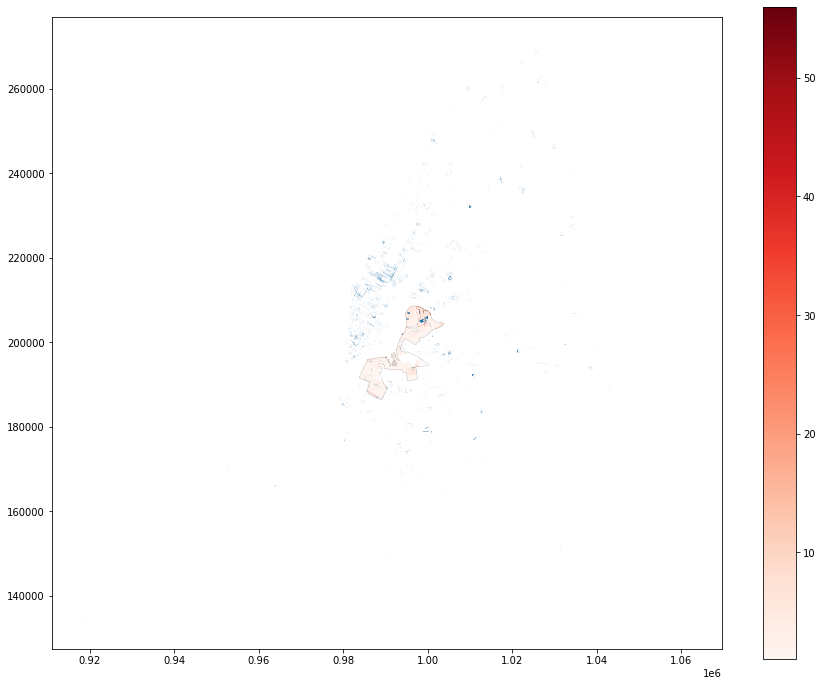

In [112]:
ax = cd33.boundary.plot(figsize=(15,12),linewidth=0.2, edgecolor='k', alpha=0.5)
ct_cd33_2020.plot(ax=ax,column='Counts', cmap='Reds',legend=True)
data_sel_2020.plot(ax=ax)

In [87]:
# import seaborn as sns # useful data viz package with Matplotlib
# import matplotlib.pyplot as plt

In [88]:
# plt.figure(figsize=(40,200))
# sns.heatmap(pivot_33, cmap='magma', linewidth=1, alpha=0.7)

# plt.savefig('../output/Citi Bike Usage Matrix', dpi=300)c

In [89]:
# gdf_month_count = gpd.GeoDataFrame(geo_month_count, crs="EPSG:2263").set_geometry('geometry')
# gdf_month_count.to_file('../output/permit_ct_monthlycount.shp')  

# gdf_month_count = gpd.GeoDataFrame(geo_month_count, crs="EPSG:2263").set_geometry('geometry')
# gdf_month_count.to_file('../output/permit_ct_monthlycount.shp')  

In [90]:
# ct_permit = gpd.GeoDataFrame(ct_data, crs="EPSG:2263").set_geometry('geometry')
# ct_permit.to_file('../output/ct_permit.shp')  